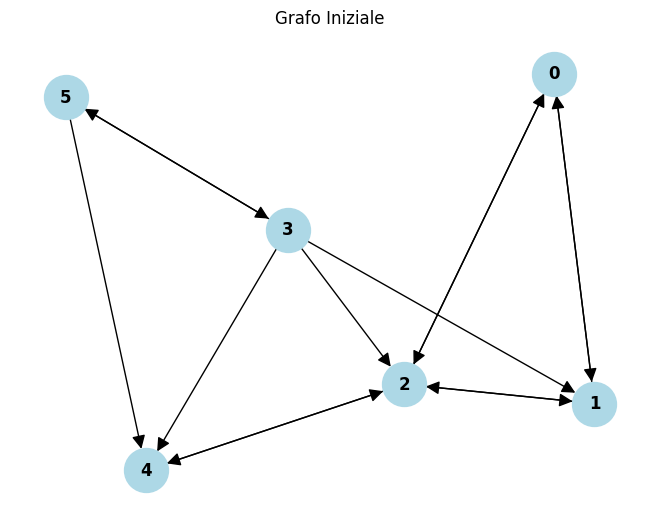

1 - 3
4 - 3
4 - 5


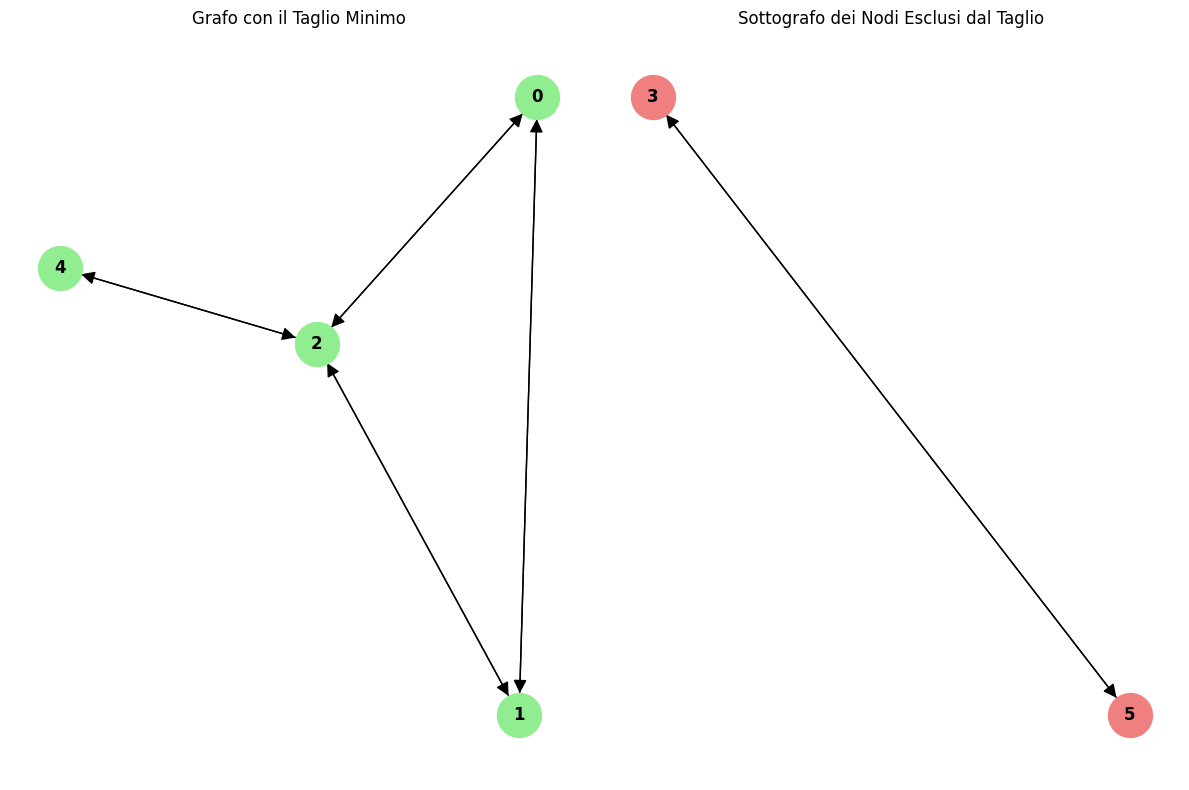

In [42]:
import networkx as nx
import matplotlib.pyplot as plt


# This class represents a directed graph
# using adjacency matrix representation
class Graph:

    def __init__(self, graph):
        self.graph = graph  # residual graph
        self.org_graph = [i[:] for i in graph]
        self.ROW = len(graph)
        self.COL = len(graph[0])

    '''Returns true if there is a path from
    source 's' to sink 't' in
    residual graph. Also fills
    parent[] to store the path '''

    def BFS(self, s, t, parent):

        # Mark all the vertices as not visited
        visited = [False] * (self.ROW)

        # Create a queue for BFS
        queue = []

        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True

        # Standard BFS Loop
        while queue:

            # Dequeue a vertex from queue and print it
            u = queue.pop(0)

            # Get all adjacent vertices of
            # the dequeued vertex u
            # If a adjacent has not been
            # visited, then mark it
            # visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        # If we reached sink in BFS starting
        # from source, then return
        # true, else false
        return True if visited[t] else False

    # Function for Depth first search
    # Traversal of the graph
    def dfs(self, graph, s, visited):
        visited[s] = True
        for i in range(len(graph)):
            if graph[s][i] > 0 and not visited[i]:
                self.dfs(graph, i, visited)

    # Returns the min-cut of the given graph
    def minCut(self, source, sink):

        # This array is filled by BFS and to store path
        parent = [-1] * (self.ROW)

        max_flow = 0  # There is no flow initially

        # Augment the flow while there is a path from source to sink
        while self.BFS(source, sink, parent):

            # Find the minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Add path flow to the overall flow
            max_flow += path_flow

            # Update residual capacities of the edges and reverse edges
            # along the path
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        # Mark visited nodes using Depth First Search (DFS)
        visited = [False] * self.ROW
        self.dfs(self.graph, source, visited)

        # Print the edges which initially had weights
        # but now have 0 weight
        for i in range(self.ROW):
            for j in range(self.COL):
                if self.graph[i][j] == 0 and self.org_graph[i][j] > 0 and visited[i]:
                    print(str(i) + " - " + str(j))

        # Store the visited array as an attribute for later use
        self.visited = visited


def get_cut_nodes(graph, source, visited):
    cut_nodes = [node for node, is_visited in enumerate(visited) if is_visited]
    uncut_nodes = [node for node, is_visited in enumerate(visited) if not is_visited]
    return cut_nodes, uncut_nodes


# Creazione del grafo non pesato
graph = [[0, 16, 13, 0, 0, 0],
         [0, 0, 10, 12, 0, 0],
         [0, 4, 0, 0, 14, 0],
         [0, 0, 9, 0, 0, 20],
         [0, 0, 0, 7, 0, 4],
         [0, 0, 0, 0, 0, 0]]

# Visualizzazione del grafo iniziale
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Grafo Iniziale")
plt.show()
# Risoluzione del min-cut
g = Graph(graph)
source = 0
sink = 5
g.minCut(source, sink)

# Ottieni i nodi inclusi nel taglio minimo e quelli esclusi
cut_nodes, uncut_nodes = get_cut_nodes(g.graph, source, g.visited)

# Creazione del grafo NetworkX non pesato
G = nx.DiGraph()
for i in range(len(graph)):
    for j in range(len(graph[i])):
        if graph[i][j] != 0:
            G.add_edge(i, j)

# Creazione del grafo finale con il taglio minimo e dei sottografi
cut_graph = G.subgraph(cut_nodes)
uncut_graph = G.subgraph(uncut_nodes)

# Visualizzazione del grafo finale con il taglio minimo e dei sottografi
plt.figure(figsize=(12, 8))

# Disegno del grafo finale con il taglio minimo
plt.subplot(1, 2, 1)
cut_pos = nx.spring_layout(cut_graph, seed=42)
nx.draw(cut_graph, cut_pos, with_labels=True, node_size=1000, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Grafo con il Taglio Minimo")

# Disegno del sottografo dei nodi esclusi dal taglio
plt.subplot(1, 2, 2)
uncut_pos = nx.spring_layout(uncut_graph, seed=42)
nx.draw(uncut_graph, uncut_pos, with_labels=True, node_size=1000, node_color='lightcoral', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Sottografo dei Nodi Esclusi dal Taglio")

# Visualizzazione dei sottografi
plt.tight_layout()
plt.show()


Creazione di un grafo più grande con una matrice di adiacenza 8x8 e ho definito tre coppie di nodi sorgente e pozzo per calcolare tre tagli distinti. La visualizzazione mostrerà i tre sottografi ottenuti da questi tagli. Puoi aggiungere altre coppie di nodi sorgente e pozzo per calcolare più tagli se desideri esplorare ulteriori configurazioni del grafo.


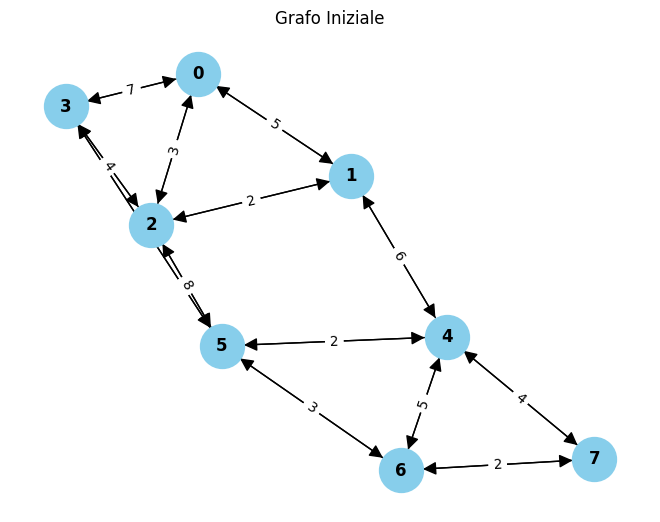

0 - 1
4 - 7
6 - 7
0 - 2
1 - 2
1 - 4
5 - 4
5 - 6
2 - 5
3 - 5


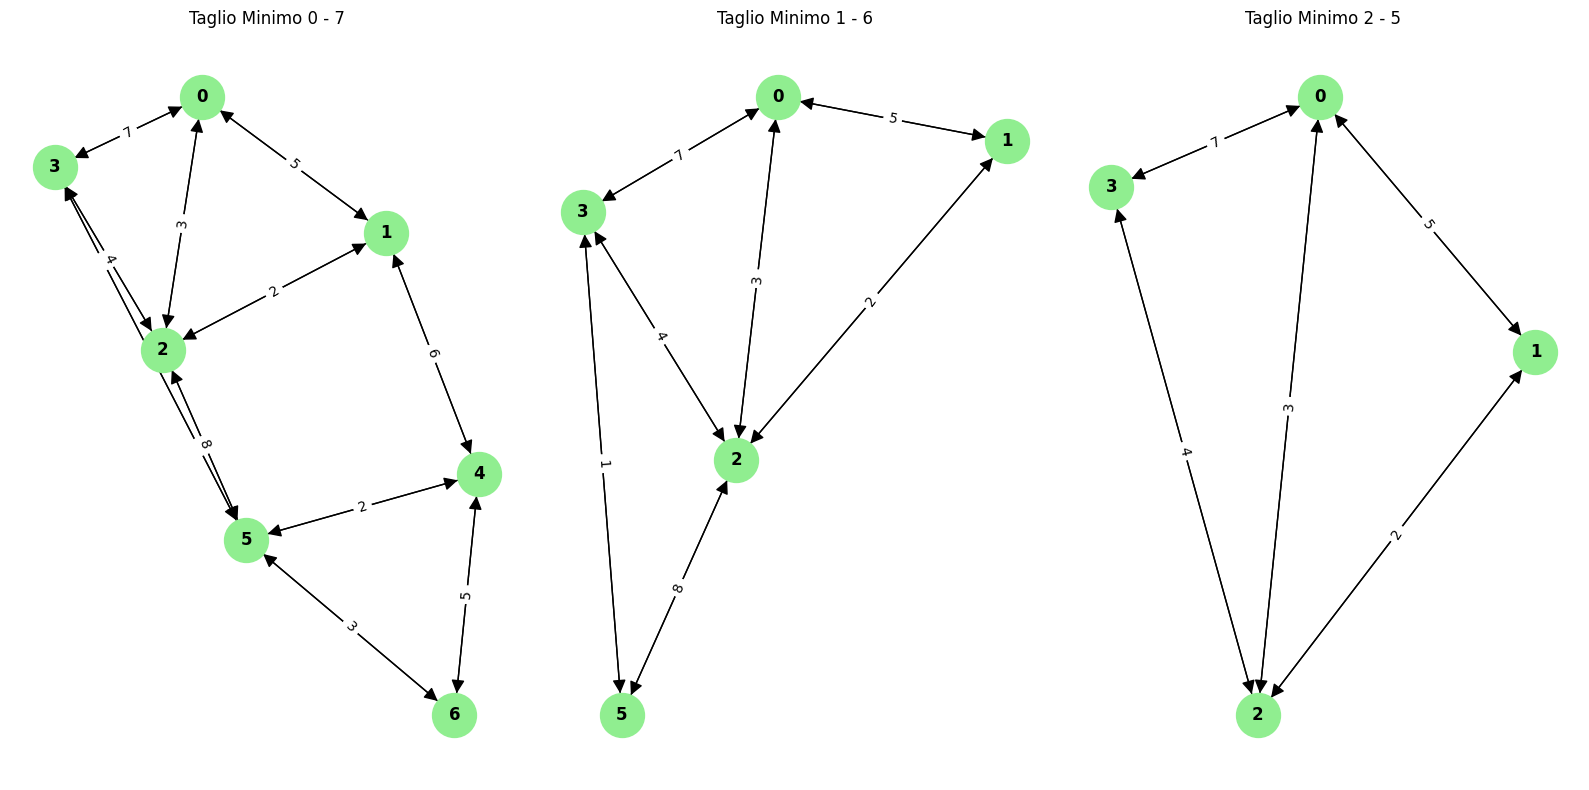

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Creazione del grafo più grande
graph = [[0, 5, 3, 7, 0, 0, 0, 0],
         [5, 0, 2, 0, 6, 0, 0, 0],
         [3, 2, 0, 4, 0, 8, 0, 0],
         [7, 0, 4, 0, 0, 1, 0, 0],
         [0, 6, 0, 0, 0, 2, 5, 4],
         [0, 0, 8, 1, 2, 0, 3, 0],
         [0, 0, 0, 0, 5, 3, 0, 2],
         [0, 0, 0, 0, 4, 0, 2, 0]]

# Creazione del grafo NetworkX
G = nx.DiGraph()
for i in range(len(graph)):
    for j in range(len(graph[i])):
        if graph[i][j] != 0:
            G.add_edge(i, j, weight=graph[i][j])
            

# Disegno del grafo
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Grafo Iniziale")
plt.show()

# Definizione di più coppie di nodi sorgente e pozzo per calcolare più tagli
source_sink_pairs = [(0, 7), (1, 6), (2, 5)]

# Risoluzione dei tagli e visualizzazione dei sottografi
plt.figure(figsize=(16, 8))
for idx, (source, sink) in enumerate(source_sink_pairs):
    g = Graph(graph)
    g.minCut(source, sink)

    # Ottieni i nodi inclusi nel taglio minimo e quelli esclusi
    cut_nodes, uncut_nodes = get_cut_nodes(g.graph, source, g.visited)

    # Creazione del grafo finale con il taglio minimo e dei sottografi
    cut_graph = G.subgraph(cut_nodes)
    uncut_graph = G.subgraph(uncut_nodes)

    # Visualizzazione del grafo finale con il taglio minimo e dei sottografi
    plt.subplot(1, len(source_sink_pairs), idx + 1)
    cut_pos = nx.spring_layout(cut_graph, seed=42)
    nx.draw(cut_graph, cut_pos, with_labels=True, node_size=1000, node_color='lightgreen', font_size=12, font_weight='bold', arrowsize=20)
    cut_edge_labels = nx.get_edge_attributes(cut_graph, 'weight')
    nx.draw_networkx_edge_labels(cut_graph, cut_pos, edge_labels=cut_edge_labels, font_size=10)
    plt.title(f"Taglio Minimo {source} - {sink}")

# Visualizzazione dei sottografi
plt.tight_layout()
plt.show()


In [55]:
from random import choice
from copy import deepcopy
import pandas as pd

def contract(graph):
    u = choice(list(graph.keys()))
    v = choice(graph[u])
    new_key = u+"-"+v 
    graph[new_key] = graph[u] + graph[v]
    del graph[u]
    del graph[v]
    for key in graph.keys():
        copy = graph[key][:]
        if new_key == key:
            for item in copy:
                if item == u or item == v:
                    graph[key].remove(item)
        else:
            for item in copy:
                if item == u or item == v:
                    graph[key].remove(item)
                    graph[key].append(new_key)
                    
    
def min_cut(graph):
    n = len(graph)
    minimum = n*(n-1)//2
    for i in range(n):
        copy =  deepcopy(graph)
        while len(copy) > 2:
            contract(copy)
            minimum = min(minimum , len(list(copy.values())[0]))
    return minimum

ModuleNotFoundError: No module named 'pandas'

7
0 1 2 3 4 5 6 
6


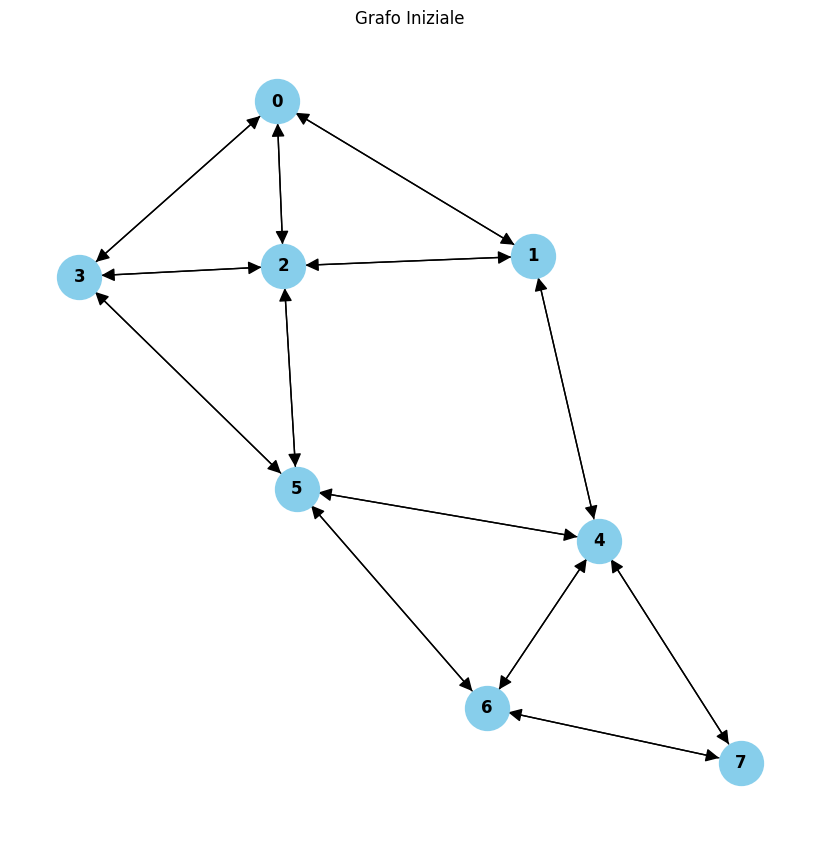

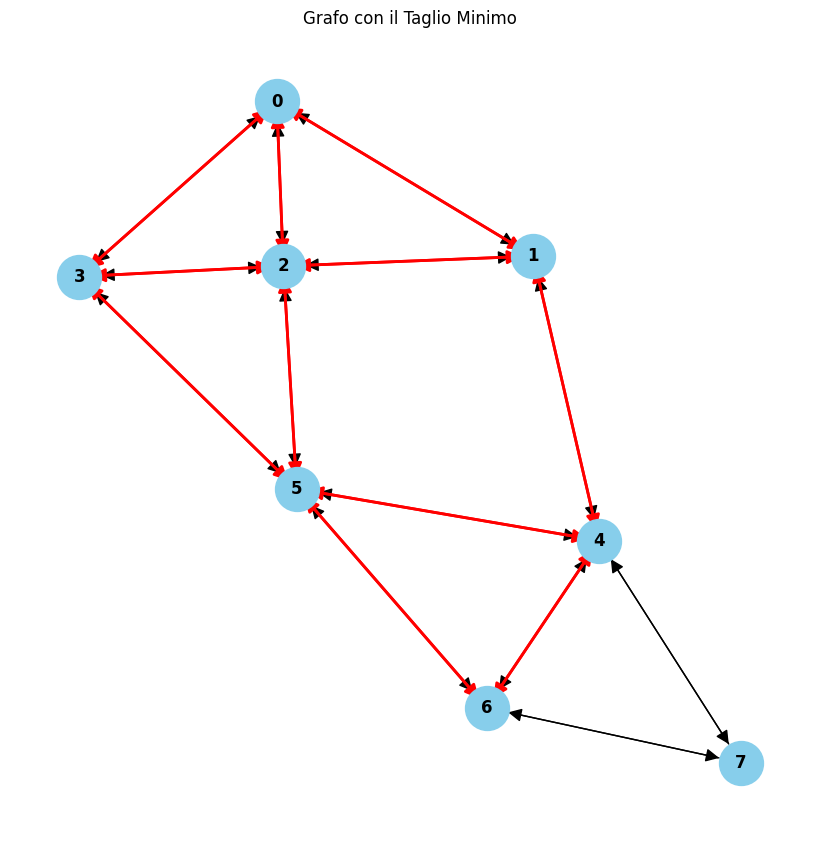

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize


import time

def bfs(residual_graph, src, target, parent, source_reachable, n_vertex):
    source_reachable.clear()
    source_reachable.extend([False] * n_vertex)
    queue = deque()
    queue.append(src)
    source_reachable[src] = True
    parent[src] = src

    while queue:
        if source_reachable[target]:
            return True

        u = queue.popleft()

        for v in range(n_vertex):
            if not source_reachable[v] and residual_graph[u][v] > 0:
                queue.append(v)
                source_reachable[v] = True
                parent[v] = u

    return False

def edmonds_karp(graph, source, target, source_reachable, n_vertex, min_cut):
    residual_graph = [row[:] for row in graph]
    parent = [-1] * n_vertex

    max_flow = 0

    while max_flow < min_cut and bfs(residual_graph, source, target, parent, source_reachable, n_vertex):
        min_path_flow = float('inf')

        v = target
        while v != source:
            u = parent[v]
            min_path_flow = min(min_path_flow, residual_graph[u][v])
            v = parent[v]

        v = target
        while v != source:
            u = parent[v]
            residual_graph[u][v] -= min_path_flow
            residual_graph[v][u] += min_path_flow
            v = parent[v]

        max_flow += min_path_flow

    return max_flow

def print_output(S_set, min_cut):
    S_size = sum(S_set)
    print(S_size)

    for i, is_included in enumerate(S_set):
        if is_included:
            print(i, end=" ")
    print()

    print(min_cut)


def run_min_cut(graph):
    n_vertex = len(graph)
    source = 0

    min_cut = float('inf')
    S_set = [False] * n_vertex

    for target in range(1, n_vertex):
        source_reachable = []
        cur_flow = edmonds_karp(graph, source, target, source_reachable, n_vertex, min_cut)
        if cur_flow < min_cut:
            S_set = source_reachable.copy()
            min_cut = cur_flow

    print_output(S_set, min_cut)

    # Creazione del grafo NetworkX
    G = nx.DiGraph()
    for i in range(len(graph)):
        for j in range(len(graph[i])):
            if graph[i][j] != 0:
                G.add_edge(i, j)

    # Creazione del grafo finale con il taglio minimo
    cut_nodes = [i for i, is_included in enumerate(S_set) if is_included]
    cut_graph = G.subgraph(cut_nodes)

    # Disegno del grafo iniziale
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
    plt.title("Grafo Iniziale")
    plt.show()

    # Disegno del grafo finale con il taglio minimo
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
    nx.draw_networkx_edges(G, pos, edgelist=cut_graph.edges(), edge_color='red', width=2.0, arrowsize=20)
    plt.title("Grafo con il Taglio Minimo")
    plt.show()

# Esempio di utilizzo
graph = [[0, 5, 3, 7, 0, 0, 0, 0],
         [5, 0, 2, 0, 6, 0, 0, 0],
         [3, 2, 0, 4, 0, 8, 0, 0],
         [7, 0, 4, 0, 0, 1, 0, 0],
         [0, 6, 0, 0, 0, 2, 5, 4],
         [0, 0, 8, 1, 2, 0, 3, 0],
         [0, 0, 0, 0, 5, 3, 0, 2],
         [0, 0, 0, 0, 4, 0, 2, 0]]

run_min_cut(graph)

import scipy as sp
import numpy as np

start = time.time()
# Find the clusters
labels = compute_clusters_given_distance(nclusters=10,Z=Z)
end = time.time()
print(end - start)

ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)


4


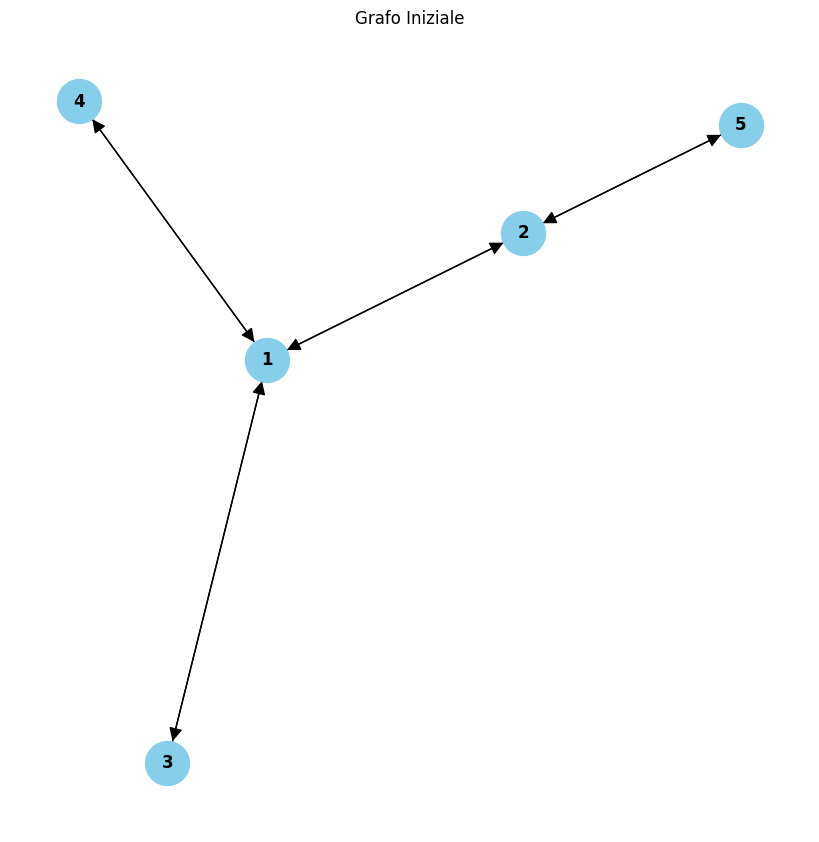

NameError: name 'create_graph_from_dict' is not defined

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def create_graph(num_vertices, num_edges, edges_list):
    vertices = set(range(1, num_vertices + 1))
    edges = defaultdict(list)

    for u, v in edges_list:
        add_edge(u, v, edges)

    return vertices, edges


""" def create_graph():
    num_vertices, num_edges = (map(int, input().split(" ")))
    vertices = set(range(1, num_vertices + 1))
    edges = defaultdict(list)

    while True:
        try:
            u, v = (map(int, input().split(" ")))
            add_edge(u, v, edges)
        except EOFError:
            break

    return vertices, edges """


# Storing the weights with a dict. The key is a -> b. Value is the weight himself
def add_edge(u, v, edges):
    edges[u].append(v)
    edges[v].append(u)


def add_weighted_edge(u, v, wedges, weights, w):
    # This method is because now our graoh is directed
    wedges[u].append(v)
    weights[u, v] = w


def isBipartite(vertex, edges, color):
    # The color array store colors assigned to all vertices. Vertex number is used as index in this array.
    # If we don't have assigned a color yet, the value in the index of that vertex is -1.
    # -1 indicate first color, 2 indicate second.

    # Enqueue source = 1 for BFS traversal
    stack = [vertex]

    while stack:
        u = stack.pop()

        # Prevents self-loop
        if u in edges[u]:
            return False

        for v in edges[u]:
            if color[v] == -1:
                color[v] = 1 - color[u]
                stack.append(v)
            elif color[v] == color[u]:
                return False
    return True


def coloring_graph(vertices, edges):
    color = [-1] * (len(vertices) + 1)
    for v in range(1, len(vertices) + 1):
        if color[v] == -1:
            if not isBipartite(v, edges, color):
                return False
    return color if True else False


def create_bipartite(color, edges, source, sink):
    A = set()
    B = set()
    for i in range(len(color)):
        if color[i] == -1:
            A.add(i)
        else:
            B.add(i)
    A.remove(0)

    weights = {}
    wedges = defaultdict(list)
    netflow = [source]

    for u in A:
        add_weighted_edge(source, u, wedges, weights, w=1)
        add_weighted_edge(u, source, wedges, weights, w=0)
        netflow.append(u)
        for v in edges[u]:
            if v not in A:
                add_weighted_edge(u, v, wedges, weights, w=1)
                add_weighted_edge(v, u, wedges, weights, w=0)
    for u in B:
        add_weighted_edge(u, sink, wedges, weights, w=1)
        add_weighted_edge(sink, u, wedges, weights, w=0)
        netflow.append(u)
    netflow.append(sink)

    return netflow, wedges, weights, A, B


# This is based on the implementation of the CLRS book.
# The ford-fulkerson algorithm needs to run BFS to find the augmentation path.
def BFS(source, sink, parent, wedges, weights):
    visited = [False] * (sink + 1)
    stack = [source]
    visited[source] = True

    while stack:
        u = stack.pop(0)

        for v in wedges[u]:
            if not visited[v] and weights[u, v] > 0:
                visited[v] = True
                parent[v] = u
                stack.append(v)

    # This 'return' means that we have a path between source and sink, founded by BFS
    return True if visited[sink] else False


# We run BFS to find the residual graph's in the original graph
# After that, we remove the problem of antiparallel edges by incresing one and decresing the other
def find_minCut(vertices, wedges, weights, source, sink):
    num_vertices = len(vertices)
    parent = [-1] * (sink + 1)
    maximum_flow = 0

    while BFS(source, sink, parent, wedges, weights):
        flow = float('infinity')
        v = sink
        while v != source:
            flow = min(flow, weights[parent[v], v])
            v = parent[v]

        maximum_flow += flow
        v = sink
        while v != source:
            u = parent[v]
            weights[u, v] -= flow
            weights[v, u] += flow
            v = parent[v]

    couting_edges(A, B, weights)


# In this method, we run DFS in the final residual graph founded by BFS.
# We use this to find the edges used by the graph. This represents the cut.
def couting_edges(A, B, weights):
    answer = 0

    for k, v in weights.items():
        if k[0] in A and k[1] in B and weights[k[0], k[1]] == 0:
            answer += 1

    print(answer)

""" num_vertices = 8
num_edges = 12
edges_list = [(1, 2), (2, 3), (3, 4), (4, 1), (2, 5), (5, 6), (6, 7), (7, 8), (8, 5), (6, 3), (7, 4), (8, 1)]

vertices, edges = create_graph(num_vertices, num_edges, edges_list)


colors = coloring_graph(vertices, edges)
netflow, wedges, weights, A, B = create_bipartite(colors, edges, source=0, sink=len(vertices) + 1)
find_minCut(netflow, wedges, weights, source=0, sink=len(vertices) + 1)

def run_min_cut(graph):
    # Creazione del grafo iniziale
    G_initial = nx.DiGraph()
    for u, v in graph.items():
        for w in v:
            G_initial.add_edge(u, w)

    # Visualizzazione del grafo iniziale
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G_initial, seed=42)
    nx.draw(G_initial, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold',
            arrowsize=20)
    plt.title("Grafo Iniziale")
    plt.show()

    vertices, edges = create_graph_from_dict(graph)
    color = coloring_graph(vertices, edges)

    if not color:
        print("Graph is not bipartite")
        return

    source = 0
    sink = len(vertices) + 1
    netflow, wedges, weights, A, B = create_bipartite(color, edges, source, sink)

    # Creazione del grafo NetworkX
    G_min_cut = nx.DiGraph()
    for u, v in wedges.items():
        for w in v:
            G_min_cut.add_edge(u, w, weight=weights[(u, w)])

    # Visualizzazione del grafo con il taglio minimo
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G_min_cut, seed=42)
    nx.draw(G_min_cut, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold',
            arrowsize=20)
    nx.draw_networkx_edges(G_min_cut, pos, edgelist=netflow, edge_color='red', width=2.0, arrowsize=20)
    plt.title("Grafo con il Taglio Minimo")
    plt.show()


# Esempio di utilizzo
graph = {
    1: [2, 3, 4],
    2: [1, 5],
    3: [1],
    4: [1],
    5: [2]
}

run_min_cut(graph)
 """
 
 
 
 
 import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# ... il resto del codice ...

def run_min_cut(graph):
    # Creazione del grafo iniziale
    G_initial = nx.DiGraph()
    for u, v in graph.items():
        for w in v:
            G_initial.add_edge(u, w)

    # Visualizzazione del grafo iniziale
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G_initial, seed=42)
    nx.draw(G_initial, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold',
            arrowsize=20)
    plt.title("Grafo Iniziale")
    plt.show()

    vertices, edges = create_graph_from_dict(graph)
    color = coloring_graph(vertices, edges)

    if not color:
        print("Graph is not bipartite")
        return

    source = 0
    sink = len(vertices) + 1
    netflow, wedges, weights, A, B = create_bipartite(color, edges, source, sink)

    # Creazione del grafo NetworkX
    G_min_cut = nx.DiGraph()
    for u, v in wedges.items():
        for w in v:
            G_min_cut.add_edge(u, w, weight=weights[(u, w)])

    # Visualizzazione del grafo con il taglio minimo
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G_min_cut, seed=42)
    nx.draw(G_min_cut, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold',
            arrowsize=20)
    nx.draw_networkx_edges(G_min_cut, pos, edgelist=netflow, edge_color='red', width=2.0, arrowsize=20)
    plt.title("Grafo con il Taglio Minimo")
    plt.show()


# Esempio di utilizzo
graph = {
    1: [2, 3, 4],
    2: [1, 5],
    3: [1],
    4: [1],
    5: [2]
}

run_min_cut(graph)



/home/proffiterol/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


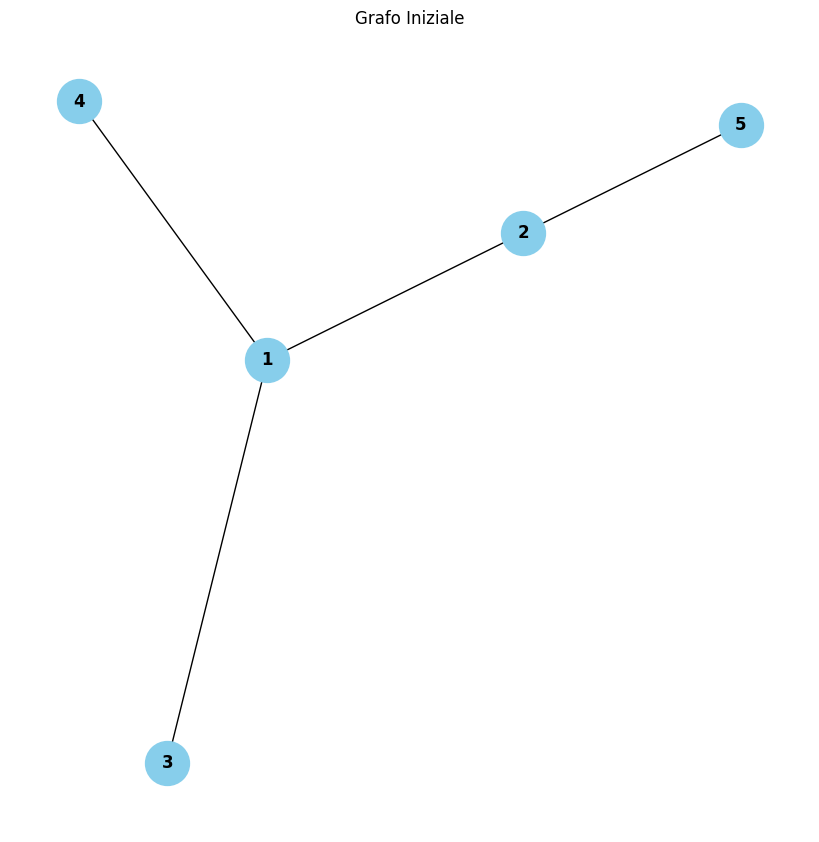

TypeError: 'int' object is not iterable

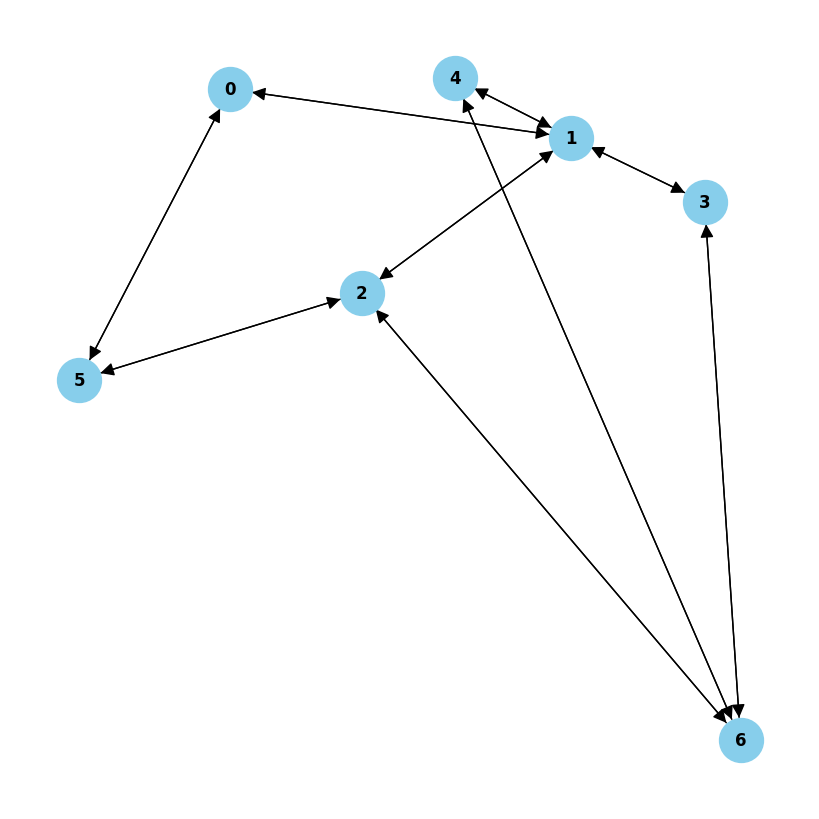

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


def add_edge(u, v, edges):
    edges[u].append(v)
    edges[v].append(u)


def add_weighted_edge(u, v, wedges, weights, w):
    wedges[u].append(v)
    weights[u, v] = w


def isBipartite(vertex, edges, color):
    stack = [vertex]

    while stack:
        u = stack.pop()

        if u in edges[u]:
            return False

        for v in edges[u]:
            if color[v] == -1:
                color[v] = 1 - color[u]
                stack.append(v)
            elif color[v] == color[u]:
                return False
    return True


def coloring_graph(vertices, edges):
    color = [-1] * (len(vertices) + 1)
    for v in range(1, len(vertices) + 1):
        if color[v] == -1:
            if not isBipartite(v, edges, color):
                return False
    return color if True else False


def create_bipartite(color, edges, source, sink):
    A = set()
    B = set()
    for i in range(len(color)):
        if color[i] == -1:
            A.add(i)
        else:
            B.add(i)
    A.remove(0)

    weights = {}
    wedges = defaultdict(list)
    netflow = [source]

    for u in A:
        add_weighted_edge(source, u, wedges, weights, w=1)
        add_weighted_edge(u, source, wedges, weights, w=0)
        netflow.append(u)
        for v in edges[u]:
            if v not in A:
                add_weighted_edge(u, v, wedges, weights, w=1)
                add_weighted_edge(v, u, wedges, weights, w=0)
    for u in B:
        add_weighted_edge(u, sink, wedges, weights, w=1)
        add_weighted_edge(sink, u, wedges, weights, w=0)
        netflow.append(u)
    netflow.append(sink)

    return netflow, wedges, weights, A, B


def run_min_cut(graph):
    vertices = set(graph.keys())
    edges = defaultdict(list)

    for u, v_list in graph.items():
        for v in v_list:
            add_edge(u, v, edges)

    # Creazione del grafo NetworkX
    G_initial = nx.Graph()
    for u, v in edges.items():
        for w in v:
            G_initial.add_edge(u, w)

    # Visualizzazione del grafo iniziale
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G_initial, seed=42)
    nx.draw(G_initial, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold',
            arrowsize=20)
    plt.title("Grafo Iniziale")
    plt.show()

    color = coloring_graph(vertices, edges)

    if not color:
        print("Graph is not bipartite")
        return

    source = 0
    sink = len(vertices) + 1
    netflow, wedges, weights, A, B = create_bipartite(color, edges, source, sink)

    # Creazione del grafo NetworkX
    G_min_cut = nx.DiGraph()
    for u, v in wedges.items():
        for w in v:
            G_min_cut.add_edge(u, w, weight=weights[(u, w)])

    # Visualizzazione del grafo con il taglio minimo
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G_min_cut, seed=42)
    nx.draw(G_min_cut, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold',
            arrowsize=20)
    nx.draw_networkx_edges(G_min_cut, pos, edgelist=netflow, edge_color='red', width=2.0, arrowsize=20)
    plt.title("Grafo con il Taglio Minimo")
    plt.show()


# Esempio di utilizzo
graph = {
    1: [2, 3, 4],
    2: [1, 5],
    3: [1],
    4: [1],
    5: [2]
}

run_min_cut(graph)
